# Compute the free energy by direct minimisation using a customised clique complex probability
*Cyril Rommens, s12495719, masterproject MSc Physics and Astronomy: Computational Physics of Complex Systems*

**Content**
Summary of the progress so far.
- Optimisation for customised clique complex probability
- Comparision of free energy calculation methods
- HCP vs phase randomised data

**Import functions and data**

In [1]:
# Import necessary libraries
import numpy as np
import glob

# Import external background functions
%run Week_16_functions.py

In [2]:
# Import HCP data
matrices = [np.genfromtxt(file) for file in glob.glob('./1000_Functional_Connectomes/Connectivity matrices/*_matrix_file.txt')]

**Plot optimisation for custom clique complex probability** ~13min computation time

In [3]:
matrix = matrices[1]
cutoff = 0.7
max_dim = 3

In [7]:
# Example for generating energy and entropy data from a given matrix
num_iterations_free_energy = 10000
free_energies = []
free_energy_probabilities_test = []
N_simulations = 1

for _ in range(N_simulations):
    clique_complex = build_clique_complex_new(matrix, cutoff, max_dim)
    inverse_connectivity_matrix = generate_inverse_connectivity_matrix(clique_complex)[1]
    initial_probabilities = generate_probability_list(clique_complex, len(inverse_connectivity_matrix), 'custom')
    free_energy_history, f_probabilities = simulated_annealing_free_energy(clique_complex, 'custom', -0.1, inverse_connectivity_matrix, num_iterations_free_energy, initial_temperature=1.0, cooling_rate=0.95)

    # Store probabilities type
    free_energies.append(free_energy_history)
    free_energy_probabilities_test.append(f_probabilities)

free_energies_average = [sum(x) / len(x) for x in zip(*free_energies)]
free_energy_probabilities_test_average = [sum(x) / len(x) for x in zip(*free_energy_probabilities_test)]

In [8]:
simplices_length = nodes_probabilities(clique_complex, distribution_type='custom', pareto_constant=-0.1)[0]

N_nodes = len(simplices_length[0])
N_edges = len(simplices_length[1])
N_triangles = len(simplices_length[2])

# Define the x-values to mark the transition
marker_x_values = [N_nodes, (N_nodes+N_edges), (N_nodes+N_edges+N_triangles)]

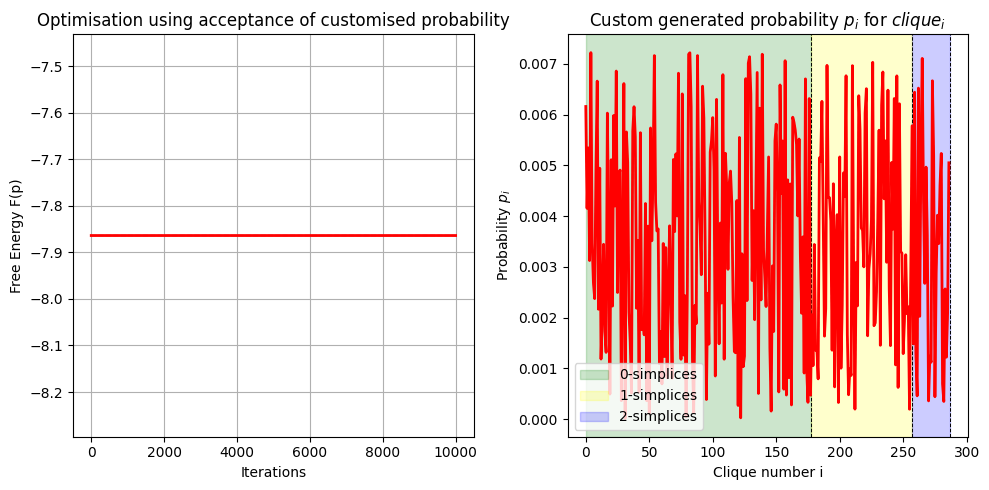

In [9]:
# Plotting the optimisation side by side
plt.figure(figsize=(10, 5))
colors = ['red', 'blue', 'green', 'orange', 'purple']

# Plot the energy/entropy evolution against the number of Simulated Annealing iterations

plt.subplot(1, 2, 1)
for i in range(N_simulations):
    plt.plot(free_energies[i], color='grey', linestyle='--', linewidth=1)
plt.plot(free_energies_average, color='red', linestyle='-', linewidth = 2)
plt.title('Optimisation using acceptance of customised probability')
plt.xlabel('Iterations')
plt.ylabel('Free Energy F(p)')
plt.grid(True)

plt.subplot(1, 2, 2)
for i in range(N_simulations):
    plt.plot(free_energy_probabilities_test[i], color='grey', linestyle='--', linewidth=1)

# Add markers at the specified x-values
for marker_x in marker_x_values:
    plt.axvline(x=marker_x, color='black', linestyle='--', linewidth = 0.7)  # Add vertical dashed lines

# Plot averaged probabilities
plt.plot(free_energy_probabilities_test_average, color='red', linestyle='-', linewidth=2)

# Add colored background regions
plt.axvspan(xmin=0, xmax=N_nodes, alpha=0.2, color='green', label='0-simplices')
plt.axvspan(xmin=N_nodes, xmax=(N_nodes+N_edges), alpha=0.2, color='yellow', label='1-simplices')
plt.axvspan(xmin=(N_nodes+N_edges), xmax=(N_nodes+N_edges+N_triangles), alpha=0.2, color='blue', label='2-simplices')

plt.xlabel('Clique number i')
plt.ylabel('Probability $p_i$')
plt.title('Custom generated probability $p_i$ for $clique_i$')
plt.legend()
#plt.grid(True)

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

**Histogram overview of free energy calculation methods**  ~22min computation time

In [107]:
free_energy_analytical = []
free_energy_direct_custom = []

cutoff = 0.7
max_dim = 3

for matrix in matrices[:10]:
    # Compute analytical free energy
    max_entropy_value, min_energy_value = analytical_functionals(matrix, cutoff, max_dim)
    free_energy_subject_3 = min_energy_value - max_entropy_value
    free_energy_analytical.append(free_energy_subject_3)

    # Compute direct free energy
    clique_complex, free_energy_subject_4, f_probabilities = computing_functionals_direct_custom(matrix, cutoff, max_dim)
    free_energy_direct_custom.append(free_energy_subject_4)

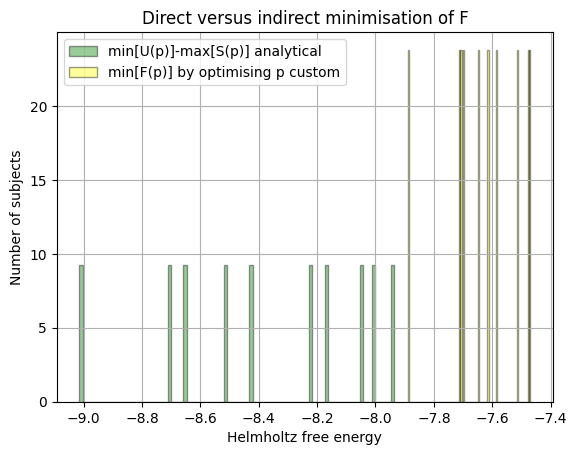

In [108]:
plt.hist(free_energy_analytical, bins=100, density=True, alpha=0.4, color='green', edgecolor='black', label = 'min[U(p)]-max[S(p)] analytical')
plt.hist(free_energy_direct_custom, bins=100, density=True, alpha=0.4, color='yellow', edgecolor='black', label = 'min[F(p)] by optimising p custom')
plt.grid(True)
plt.title('Direct versus indirect minimisation of F')
plt.ylabel('Number of subjects')
plt.xlabel('Helmholtz free energy')
plt.legend()
plt.show()

Why is the first energy value for the free energy optimisation a internal energy calculation??